In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset
index       = pd.Series(['A','B','C','D','E','F','G'])
horse_power = pd.Series([130, 250, 190, 300, 210, 220, 170])
weight      = pd.Series([1900, 2600, 2200, 2900, 2400, 2300, 2100])
fuel        = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])

# dataframe 도출
#power는 마력, gross weight는 총 중량, mileage는 연비
Fuel_Efficiency = pd.DataFrame({'index': index, 'horse_power' : horse_power, 'weight' : weight, 'fuel' : fuel})
print(Fuel_Efficiency)

  index  horse_power  weight  fuel
0     A          130    1900  16.3
1     B          250    2600  10.2
2     C          190    2200  11.1
3     D          300    2900   7.1
4     E          210    2400  12.1
5     F          220    2300  13.2
6     G          170    2100  14.2


In [3]:
# x값과 y값을 벡터로 변환

x1  = Fuel_Efficiency['horse_power'].to_numpy()
x2  = Fuel_Efficiency['weight'].to_numpy()
y   = Fuel_Efficiency['fuel'].to_numpy()

print(x1)
print(x2)
print(y)

[130 250 190 300 210 220 170]
[1900 2600 2200 2900 2400 2300 2100]
[16.3 10.2 11.1  7.1 12.1 13.2 14.2]


In [4]:
# 선형회귀모델의 입력형식에 맞게 각 벡터의 차원의 확장
x1  = x1[:, np.newaxis]
x2  = x2[:, np.newaxis]
X   = np.c_[np.ones((x1.size, 1)), x1, x2] # 1 , x1, x2인 배열로 바꿈

In [5]:
# 위 연산을 통해 각 차원의 벡터가 3열로 바뀜
X

array([[1.0e+00, 1.3e+02, 1.9e+03],
       [1.0e+00, 2.5e+02, 2.6e+03],
       [1.0e+00, 1.9e+02, 2.2e+03],
       [1.0e+00, 3.0e+02, 2.9e+03],
       [1.0e+00, 2.1e+02, 2.4e+03],
       [1.0e+00, 2.2e+02, 2.3e+03],
       [1.0e+00, 1.7e+02, 2.1e+03]])

In [6]:
#정규방정식을 이용해 훈련
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 3.06040541e+01, -6.89189189e-03, -7.31081081e-03])

In [7]:
#y_hat값을 도출
y_hat = theta[1] * x1 + theta[2] * x2 + theta[0]
y_hat = np.concatenate(y_hat).tolist()
y_hat = np.array(y_hat)
y_hat

array([15.81756757,  9.87297297, 13.21081081,  7.33513514, 11.61081081,
       12.27297297, 14.07972973])

In [8]:
#오차(mse) 도출
diff_square = (y_hat - y)**2 
print(diff_square)
e_mse = diff_square.sum() / len(y) # '원소 전체 합 / 벡터의 길이'
print(e_mse)

[0.23274105 0.10694668 4.45552228 0.05528853 0.23930606 0.85937911
 0.01446494]
0.851949806949806


In [9]:
print("계수 : [", theta[1], theta[2],"]")
print("절편 : ", theta[0])
print("예측 점수 : ", e_mse)

계수 : [ -0.0068918918918915995 -0.007310810810811627 ]
절편 :  30.604054054052725
예측 점수 :  0.851949806949806


In [10]:
print("270 마력 2500kg 자동차의 예상 연비 : ", 270 * theta[1] + 2500 * theta[2] + theta[0])

270 마력 2500kg 자동차의 예상 연비 :  10.466216216212924


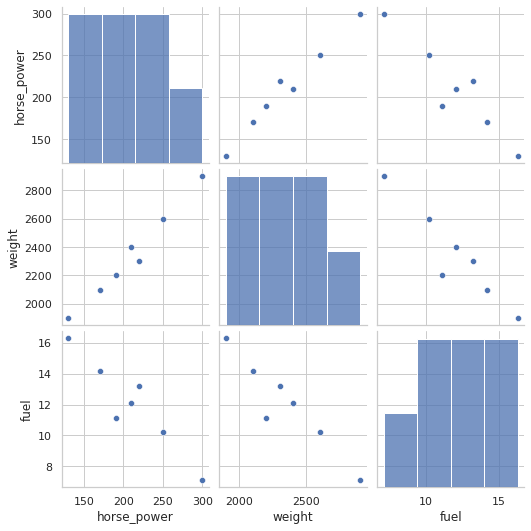

In [11]:
# 선형회귀 모델 도출
regr = linear_model.LinearRegression()

sns.set(style = 'whitegrid')
sns.pairplot(Fuel_Efficiency)
plt.show()

In [12]:
# 예측치(y_hat)와 오차(diff_squeare)를 추가한 dataframe
resultset = pd.DataFrame(data = { 'index' : index, 'horse power' : horse_power, 'weight' : weight, 'fuel' : fuel, 'estimate' : y_hat, 'error' : diff_square})
resultset.head()

,index,horse power,weight,fuel,estimate,error
0,A,130,1900,16.3,15.817568,0.232741
1,B,250,2600,10.2,9.872973,0.106947
2,C,190,2200,11.1,13.210811,4.455522
3,D,300,2900,7.1,7.335135,0.055289
4,E,210,2400,12.1,11.610811,0.239306


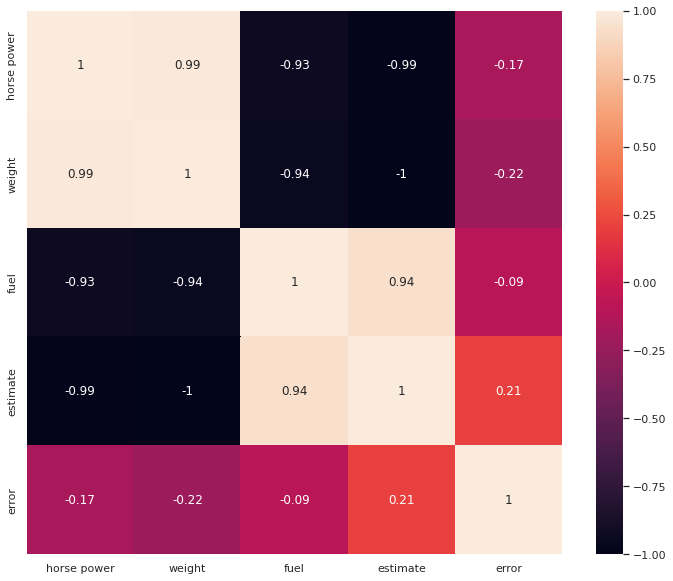

In [13]:
# heatmap 출력
sns.set(rc = {'figure.figsize' : (12,10)})
correlation_matrix = resultset.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)